# WeatherPy
----

## My Observations:
* It was fascinating to discover that some factors, such as humidity and max temperatures, tend to have similar outcomes in certain regions in both the Northern and Southern Hemispheres. Keep in mind, we are observing all of this during the summer season. For instance, the max temperatures (see Fig1) are continously the highest at and near the Equator. In Fig2, we see the humidity is usually 50% or higher at and around the Equator where in other regions up in the North and South all vary anywhere between 3-100%. 
* The cloudiness was interesting to me because before performing this analysis I figured it would be mostly cloudy in the regions where extreme weather occurs such as the Equator and both North and South poles. However, as I performed this analysis I discovered that cloudiness it pretty much all over the place in both Hemispheres no matter what the other weather conditions are like. While some cities in their respective regions have more clusters of  clear skies or very cloudy days the plot (see Fig3) shows us that it is dispersed fairly well over the entire globe.
* When it came to analyzing the wind speeds I did not imagine the wind speeds would be so low for some areas. I expected to fins high winds in at least a few areas around the world. However, the highest speeds I could find during this analysis were at most 25-35mph. I was surprised to make this discovery. The majority of the world was experiencing anywhere between 1-10mph winds (refer to Fig4).

In [1]:
# Dependencies and Setup:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
from pprint import pprint
import requests
import time
from scipy.stats import linregress

# Import API key:
from api_keys import weather_api_key

# Using citipy to determine city based on latitude and longitude:
from citipy import citipy

# Range of latitudes and longitudes:
lat_range = (-90, 90)
lng_range = (-180, 180)

# Using 'Timestamp' to print the current date for whenever code runs:
current_date = pd.Timestamp("today").strftime("%m/%d/%Y")

In [2]:
# List for holding lat_lngs and cities:
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations:
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination:
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list:
    if city not in cities:
        cities.append(city)

# Print to confirm sufficient count of cities:
len(cities)

597

In [3]:
cities_pd = pd.DataFrame(cities)
cities_pd = cities_pd.rename(columns={0: "City"})
cities_pd["Latitude"] = ""
cities_pd["Longitude"] = ""
cities_pd["Max Temperature"] = ""
cities_pd["Humidity"] = ""
cities_pd["Cloudiness"] = ""
cities_pd["Wind Speed"] = ""
cities_pd["Country"] = ""
cities_pd["Date"] = ""
cities_pd.head()

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,mount isa,,,,,,,,
1,erzin,,,,,,,,
2,hovd,,,,,,,,
3,upata,,,,,,,,
4,busselton,,,,,,,,


In [4]:
# Performing the API calls and printing the log all at once:

units = "imperial"
url = "http://api.openweathermap.org/data/2.5/weather?"

print("----------------------------------------")
print("Beginning Data Retrieval:")
print("----------------------------------------")

# Creating lists to store the city/location, temp, etc:
location = []
lat = []
long = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

city_num = 1
city_set = 1

# Created 'for loop' to search through the list of cities for city as we call the API:
for city in cities:
    q_url = f"{url}&appid={weather_api_key}&q={city}&units={units}"
    temp_response = requests.get(q_url).json()
    
    print(f"Processing records: {city_num} of Set {city_set} | {city}")

    try:
        city_num += 1
        location.append(temp_response['name'])        
        lat.append(temp_response['coord']['lat'])
        long.append(temp_response['coord']['lon'])
        max_temp.append(temp_response['main']['temp'])
        humidity.append(temp_response['main']['humidity'])
        cloudiness.append(temp_response['clouds']['all'])
        wind_speed.append(temp_response['wind']['speed'])
        country.append(temp_response['sys']['country'])
        date.append(temp_response['dt'])
        
    except (KeyError, IndexError):
        print("City not found. Resuming...")
        pass
    
    if city_num == 51:
        city_set += 1
        city_num = 1
        
print("---------------------------------------")
print("Data Retrieval Complete")
print("---------------------------------------")

----------------------------------------
Beginning Data Retrieval:
----------------------------------------
Processing records: 1 of Set 1 | mount isa
Processing records: 2 of Set 1 | erzin
Processing records: 3 of Set 1 | hovd
Processing records: 4 of Set 1 | upata
Processing records: 5 of Set 1 | busselton
Processing records: 6 of Set 1 | barentsburg
City not found. Resuming...
Processing records: 7 of Set 1 | butterworth
Processing records: 8 of Set 1 | borskoye
Processing records: 9 of Set 1 | taolanaro
City not found. Resuming...
Processing records: 10 of Set 1 | bredasdorp
Processing records: 11 of Set 1 | rancho palos verdes
Processing records: 12 of Set 1 | naco
Processing records: 13 of Set 1 | deputatskiy
Processing records: 14 of Set 1 | vanimo
Processing records: 15 of Set 1 | nizhneyansk
City not found. Resuming...
Processing records: 16 of Set 1 | illapel
Processing records: 17 of Set 1 | beringovskiy
Processing records: 18 of Set 1 | ramgarh
Processing records: 19 of Set

Processing records: 29 of Set 4 | nokaneng
Processing records: 30 of Set 4 | berlevag
Processing records: 31 of Set 4 | vardo
Processing records: 32 of Set 4 | lorengau
Processing records: 33 of Set 4 | alice springs
Processing records: 34 of Set 4 | puerto quijarro
Processing records: 35 of Set 4 | burnie
Processing records: 36 of Set 4 | pompeia
Processing records: 37 of Set 4 | morros
Processing records: 38 of Set 4 | iqaluit
Processing records: 39 of Set 4 | aloleng
Processing records: 40 of Set 4 | polunochnoye
Processing records: 41 of Set 4 | belushya guba
City not found. Resuming...
Processing records: 42 of Set 4 | ialibu
Processing records: 43 of Set 4 | walvis bay
Processing records: 44 of Set 4 | warmbad
Processing records: 45 of Set 4 | bambous virieux
Processing records: 46 of Set 4 | koslan
Processing records: 47 of Set 4 | kruisfontein
Processing records: 48 of Set 4 | ahipara
Processing records: 49 of Set 4 | upernavik
Processing records: 50 of Set 4 | eregli
Processin

Processing records: 10 of Set 8 | marystown
Processing records: 11 of Set 8 | saint-pierre
Processing records: 12 of Set 8 | portland
Processing records: 13 of Set 8 | hudson bay
Processing records: 14 of Set 8 | honningsvag
Processing records: 15 of Set 8 | abu zabad
Processing records: 16 of Set 8 | trincomalee
Processing records: 17 of Set 8 | gangotri
City not found. Resuming...
Processing records: 18 of Set 8 | rivera
Processing records: 19 of Set 8 | tsihombe
City not found. Resuming...
Processing records: 20 of Set 8 | mazatlan
Processing records: 21 of Set 8 | alta floresta
Processing records: 22 of Set 8 | belaya gora
Processing records: 23 of Set 8 | bolshiye berezniki
City not found. Resuming...
Processing records: 24 of Set 8 | formosa do rio preto
Processing records: 25 of Set 8 | cap-aux-meules
Processing records: 26 of Set 8 | kodlipet
Processing records: 27 of Set 8 | bosaso
Processing records: 28 of Set 8 | oktyabrskiy
Processing records: 29 of Set 8 | barawe
City not 

Processing records: 36 of Set 11 | iisalmi
Processing records: 37 of Set 11 | taltal
Processing records: 38 of Set 11 | boa vista
Processing records: 39 of Set 11 | hambantota
Processing records: 40 of Set 11 | kayiry
Processing records: 41 of Set 11 | sambava
Processing records: 42 of Set 11 | omsukchan
Processing records: 43 of Set 11 | itarema
Processing records: 44 of Set 11 | ambon
Processing records: 45 of Set 11 | marsh harbour
Processing records: 46 of Set 11 | muravlenko
Processing records: 47 of Set 11 | weligama
Processing records: 48 of Set 11 | scarborough
Processing records: 49 of Set 11 | piatra soimului
Processing records: 50 of Set 11 | coari
Processing records: 1 of Set 12 | sumbawa
City not found. Resuming...
Processing records: 2 of Set 12 | goderich
Processing records: 3 of Set 12 | garwolin
Processing records: 4 of Set 12 | nago
Processing records: 5 of Set 12 | bossembele
City not found. Resuming...
Processing records: 6 of Set 12 | itacare
Processing records: 7 

In [5]:
# Verifing the amount of cities processed remains the same as when we pulled the info:
cities_pd.count()

City               597
Latitude           597
Longitude          597
Max Temperature    597
Humidity           597
Cloudiness         597
Wind Speed         597
Country            597
Date               597
dtype: int64

In [6]:
# Displaying the DataFrame:
cities_pd = pd.DataFrame({
    "City": location,
    "Latitude": lat,
    "Longitude": long,
    "Max Temperature": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
})

cities_pd.head(10)

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mount Isa,-20.73,139.50,48.20,57,0,8.05,AU,1594586492
1,Erzin,36.96,36.20,80.01,87,20,3.00,TR,1594586492
2,Khovd,48.01,91.64,58.82,74,35,0.72,MN,1594586382
3,Upata,8.01,-62.40,91.00,60,11,1.99,VE,1594586493
4,Busselton,-33.65,115.33,54.16,87,37,13.87,AU,1594586493
5,Butterworth,5.40,100.36,79.25,94,40,2.93,MY,1594586493
6,Borskoye,53.03,51.72,69.04,79,79,3.40,RU,1594586494
7,Bredasdorp,-34.53,20.04,48.20,66,0,2.24,ZA,1594586494
8,Rancho Palos Verdes,33.74,-118.39,79.66,69,5,16.11,US,1594586428
9,Naco,31.33,-109.95,100.62,14,0,5.01,MX,1594586495


In [7]:
# Converting the city data into a 'csv' file:
cities_output = cities_pd.to_csv('../OutputData/cities.csv', index=False)

In [8]:
# The amount of rows printed will verify that only the cities that were found via API call and will be stored in the dataframe:
cities_pd

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mount Isa,-20.73,139.50,48.20,57,0,8.05,AU,1594586492
1,Erzin,36.96,36.20,80.01,87,20,3.00,TR,1594586492
2,Khovd,48.01,91.64,58.82,74,35,0.72,MN,1594586382
3,Upata,8.01,-62.40,91.00,60,11,1.99,VE,1594586493
4,Busselton,-33.65,115.33,54.16,87,37,13.87,AU,1594586493
...,...,...,...,...,...,...,...,...,...
540,Zapolyarnyy,69.42,30.81,44.60,87,90,11.41,RU,1594586633
541,Dabat,12.98,37.77,53.69,100,100,5.48,ET,1594586633
542,Sinnamary,5.38,-52.95,79.81,86,48,10.07,GF,1594586514
543,Mporokoso,-9.37,30.12,63.09,50,0,7.47,ZM,1594586633


In [9]:
# Find the cities with humidity that is over 100%:
humidity_over100 = cities_pd.sort_values('Humidity', ascending=False)
humidity_over100

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
160,Port Macquarie,-31.43,152.92,41.45,100,0,1.12,AU,1594586534
425,Luba,3.46,8.55,75.20,100,40,5.82,GQ,1594586603
279,Tateyama,34.98,139.87,68.63,100,100,4.00,JP,1594586565
475,Petropavlovsk-Kamchatskiy,53.05,158.65,55.40,100,90,6.71,RU,1594586333
443,Pattani,6.75,100.42,77.00,100,40,2.30,TH,1594586607
...,...,...,...,...,...,...,...,...,...
71,Saint George,37.10,-113.58,108.14,12,1,4.70,US,1594586264
309,Silver City,32.77,-108.28,96.71,11,1,6.93,US,1594586313
414,Gillette,44.29,-105.50,94.10,10,1,9.17,US,1594586496
227,Farmington,36.73,-108.22,99.14,9,1,18.34,US,1594586316


In [10]:
# No humidity over 100% was found; therefore, moving onto the next analysis.

## Latitude vs. Temperature Plot

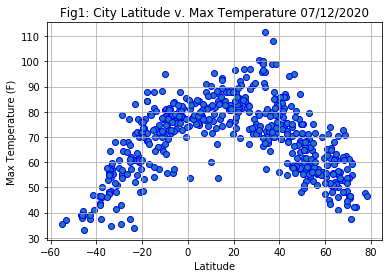

In [11]:
# Plotting 'Latitude v. Max Temperature':
x = cities_pd['Latitude']
y = cities_pd['Max Temperature']
plt.scatter(x, y, edgecolor='b')
plt.title(f"Fig1: City Latitude v. Max Temperature {current_date}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig('../OutputData/Fig1.png')
plt.show()

* This plot, 'City Latitude v. Max Temperature', illustrates that the temperatures are higher in the regions/cities closer to the Equator. Therefore, the temperatures lower in the cities closer to the North and South poles.

## Latitude vs. Humidity Plot

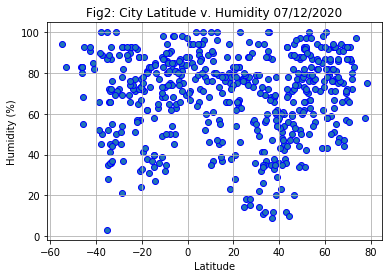

In [12]:
# Plotting Latitude v. Humidity:
x = cities_pd['Latitude']
y = cities_pd['Humidity']
plt.scatter(x, y, edgecolor='b')
plt.title(f"Fig2: City Latitude v. Humidity {current_date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig('../OutputData/Fig2.png')
plt.show()

* This plot, 'City Latitude v. Humidity', illustrates that the humidity in some regions can range anywhere from about 3-100%. Meanwhile, at the Equator (and regions close by) are usually high in humidity ranging anywhere from 50-100% as of today.

## Latitude vs. Cloudiness Plot

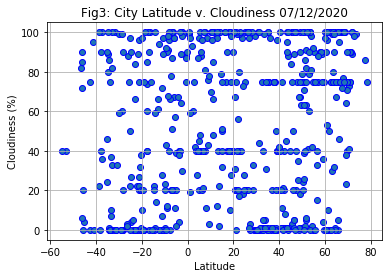

In [13]:
# Plotting latitude v. cloudiness:
x = cities_pd['Latitude']
y = cities_pd['Cloudiness']
plt.scatter(x, y, edgecolor='b')
plt.title(f"Fig3: City Latitude v. Cloudiness {current_date}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig('../OutputData/Fig3.png')
plt.show()

* This plot, 'City Latitude v. Cloudiness', illustrates that cloudiness is all over the place no matter where in the world you may be today.

## Latitude vs. Wind Speed Plot

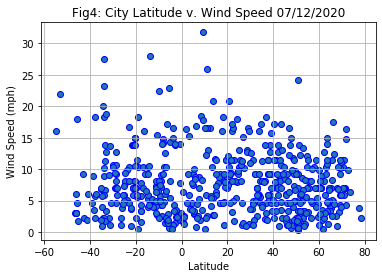

In [14]:
# Plotting latitude v. wind_speed:
x = cities_pd['Latitude']
y = cities_pd['Wind Speed']
plt.scatter(x, y, edgecolor='b')
plt.title(f"Fig4: City Latitude v. Wind Speed {current_date}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig('../OutputData/Fig4.png')
plt.show()

* This plot, 'City Latitude v. Wind Speed', illustrates the wind speeds all over the world as of today.

## Linear Regression

In [15]:
# Create Northern and Southern Hemisphere DataFrames

# Northern Hemisphere (on Latitude from 0 to 90 degrees):
northern_hemi = cities_pd.loc[(cities_pd['Latitude'] >= 0)]
northern_hemi

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
1,Erzin,36.96,36.20,80.01,87,20,3.00,TR,1594586492
2,Khovd,48.01,91.64,58.82,74,35,0.72,MN,1594586382
3,Upata,8.01,-62.40,91.00,60,11,1.99,VE,1594586493
5,Butterworth,5.40,100.36,79.25,94,40,2.93,MY,1594586493
6,Borskoye,53.03,51.72,69.04,79,79,3.40,RU,1594586494
...,...,...,...,...,...,...,...,...,...
538,Fjerritslev,57.08,9.27,55.99,86,88,10.00,DK,1594586632
540,Zapolyarnyy,69.42,30.81,44.60,87,90,11.41,RU,1594586633
541,Dabat,12.98,37.77,53.69,100,100,5.48,ET,1594586633
542,Sinnamary,5.38,-52.95,79.81,86,48,10.07,GF,1594586514


In [16]:
# This will show me the cities farthest and closest in the Northern Hemisphere:
north_high_to_low = northern_hemi.sort_values('Latitude', ascending=False)
north_high_to_low

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
237,Longyearbyen,78.22,15.64,46.40,75,75,2.24,SJ,1594586266
144,Qaanaaq,77.48,-69.36,47.61,58,86,3.80,GL,1594586498
138,Dikson,73.51,80.55,42.35,97,99,6.38,RU,1594586527
182,Upernavik,72.79,-56.15,42.10,83,98,9.89,GL,1594586539
61,Khatanga,71.97,102.50,54.72,77,100,14.74,RU,1594586497
...,...,...,...,...,...,...,...,...,...
483,Mitú,1.20,-70.17,82.62,67,59,2.33,CO,1594586507
134,Kitale,1.02,35.01,53.89,94,19,1.23,KE,1594586527
308,Amapá,1.00,-52.00,81.28,71,97,2.51,BR,1594586572
463,Thinadhoo,0.53,72.93,84.60,70,100,6.38,MV,1594586612


In [17]:
# Southern Hemisphere (on Latitude less than 0 degrees):
southern_hemi = cities_pd.loc[(cities_pd['Latitude'] < 0)]
southern_hemi

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mount Isa,-20.73,139.50,48.20,57,0,8.05,AU,1594586492
4,Busselton,-33.65,115.33,54.16,87,37,13.87,AU,1594586493
7,Bredasdorp,-34.53,20.04,48.20,66,0,2.24,ZA,1594586494
11,Vanimo,-2.67,141.30,77.90,83,100,1.41,PG,1594586495
12,Illapel,-31.63,-71.17,68.07,46,100,2.19,CL,1594586495
...,...,...,...,...,...,...,...,...,...
524,Katherine,-14.47,132.27,64.40,27,100,9.17,AU,1594586628
533,Imbituba,-28.24,-48.67,68.00,82,20,6.93,BR,1594586631
536,Ulladulla,-35.35,150.47,46.20,100,90,6.93,AU,1594586620
539,Acarí,-15.43,-74.62,72.63,37,0,6.51,PE,1594586633


In [18]:
# This will show me the cities closest and farthest in the Southern Hemisphere:
south_low_to_high = southern_hemi.sort_values('Latitude', ascending=True)
south_low_to_high

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
107,Ushuaia,-54.80,-68.30,35.60,94,40,16.11,AR,1594586346
20,Punta Arenas,-53.15,-70.92,37.20,83,40,21.92,CL,1594586244
60,Bluff,-46.60,168.33,39.00,83,82,3.00,NZ,1594586500
358,Kaitangata,-46.28,169.85,37.99,80,6,5.99,NZ,1594586585
17,Mataura,-46.19,168.86,39.00,83,90,3.00,NZ,1594586497
...,...,...,...,...,...,...,...,...,...
166,Lorengau,-2.02,147.27,81.52,75,99,2.44,PG,1594586536
63,Puerto Ayora,-0.74,-90.35,70.00,84,88,1.99,EC,1594586504
428,Port-Gentil,-0.72,8.78,77.00,88,75,14.05,GA,1594586436
212,Hithadhoo,-0.60,73.08,85.28,69,87,7.78,MV,1594586252


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.49063940145675394


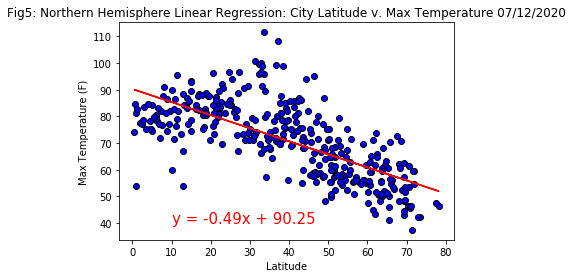

In [19]:
# Plotting linear regression for the Northern Hemisphere by 'Latitude v. Max Temperature':
x = northern_hemi['Latitude']
y = northern_hemi['Max Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eqn = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x, y, facecolor='blue', edgecolor='black')
plt.plot(x, regress_values, "r-")
plt.annotate(line_eqn,(10,40), fontsize=15, color="r")
plt.title(f"Fig5: Northern Hemisphere Linear Regression: City Latitude v. Max Temperature {current_date}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
print(f"The r-squared is: {rvalue**2}")
plt.savefig('../OutputData/Fig5.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6558026504808434


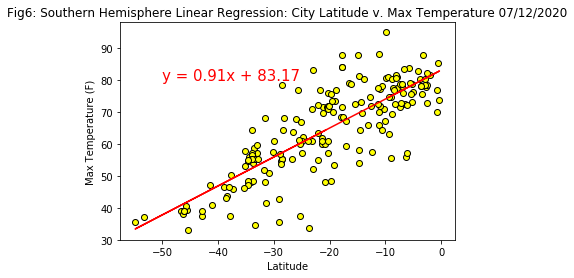

In [20]:
# Plotting linear regression for the Southern Hemisphere by 'Latitude v. Max Temperature':
x = southern_hemi['Latitude']
y = southern_hemi['Max Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eqn = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x, y, facecolor='yellow', edgecolor='black')
plt.plot(x, regress_values, "r-")
plt.annotate(line_eqn,(-50,80), fontsize=15, color="r")
plt.title(f"Fig6: Southern Hemisphere Linear Regression: City Latitude v. Max Temperature {current_date}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
print(f"The r-squared is: {rvalue**2}")
plt.savefig('../OutputData/Fig6.png')
plt.show()

* Comparing the Northern and Southern Hemisphere:
    * The Northern Hemisphere has a downward trend that temperatures decrease steadily as you travel farther up North.
    * In the Southern Hemisphere, there is an upward trend that shows temperatures rise steadily as you travel closer to the Equator.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0025027901548199277


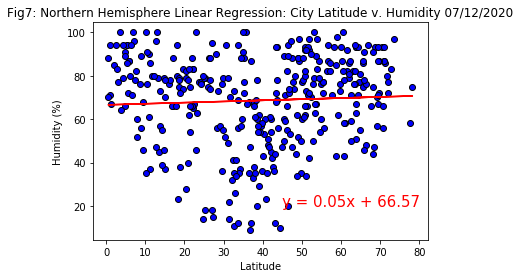

In [21]:
# Plotting linear regression for the Northern Hemisphere by 'Latitude v. Humidity':
x = northern_hemi['Latitude']
y = northern_hemi['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eqn = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x, y, facecolor='blue', edgecolor='black')
plt.plot(x, regress_values, "r-")
plt.annotate(line_eqn,(45,20), fontsize=15, color="r")
plt.title(f"Fig7: Northern Hemisphere Linear Regression: City Latitude v. Humidity {current_date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-squared is: {rvalue**2}")
plt.savefig('../OutputData/Fig7.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0029548721969997233


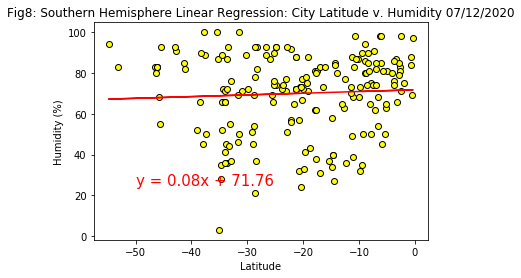

In [22]:
# Plotting linear regression for the Southern Hemisphere by 'Latitude v. Humidity':
x = southern_hemi['Latitude']
y = southern_hemi['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eqn = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x, y, facecolor='yellow', edgecolor='black')
plt.plot(x, regress_values, "r-")
plt.annotate(line_eqn,(-50,25), fontsize=15, color="r")
plt.title(f"Fig8: Southern Hemisphere Linear Regression: City Latitude v. Humidity {current_date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-squared is: {rvalue**2}")
plt.savefig('../OutputData/Fig8.png')
plt.show()

* Observing the Northern and Southern Hemisphere:
    * The Northern Hemisphere has a very small, slight upward regression.
    * The humidity in both hemispheres show a consistent relationship that the humidity is generally highest amongst the cities near the Equator.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0029347118558707363


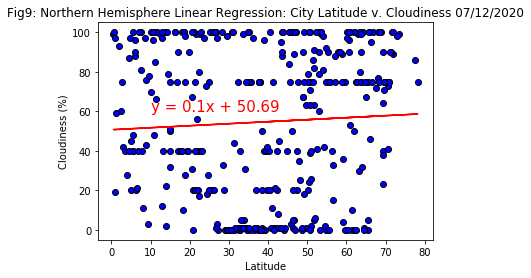

In [23]:
# Plotting linear regression for the Northern Hemisphere by 'Latitude v. Cloudiness':
x = northern_hemi['Latitude']
y = northern_hemi['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eqn = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x, y, facecolor='blue', edgecolor='black')
plt.plot(x, regress_values, "r-")
plt.annotate(line_eqn,(10,60), fontsize=15, color="r")
plt.title(f"Fig9: Northern Hemisphere Linear Regression: City Latitude v. Cloudiness {current_date}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-squared is: {rvalue**2}")
plt.savefig('../OutputData/Fig9.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.02461656826908874


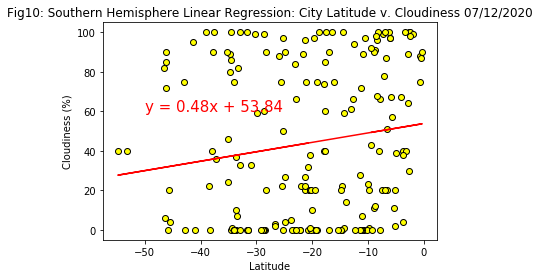

In [24]:
# Plotting linear regression for the Southern Hemisphere by 'Latitude v. Cloudiness':
x = southern_hemi['Latitude']
y = southern_hemi['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eqn = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x, y, facecolor='yellow', edgecolor='black')
plt.plot(x, regress_values, "r-")
plt.annotate(line_eqn,(-50,60), fontsize=15, color="r")
plt.title(f"Fig10: Southern Hemisphere Linear Regression: City Latitude v. Cloudiness {current_date}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-squared is: {rvalue**2}")
plt.savefig('../OutputData/Fig10.png')
plt.show()

* Comparing the Northern and Southern Hemisphere:
    * The Northern Hemisphere the cloudiness is basically evenly dispersed across the entire hemisphere. No one particular region or accumulation of cities occurs but still shows a downward trend as you get closer to the North Pole.
    * Simiarly, the Southern Hemisphere, the scatter points are somewhat dispersed. The Southern Hemisphere shows an upward trend in cloudiness as you get closer to the Equator.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.017286381330917217


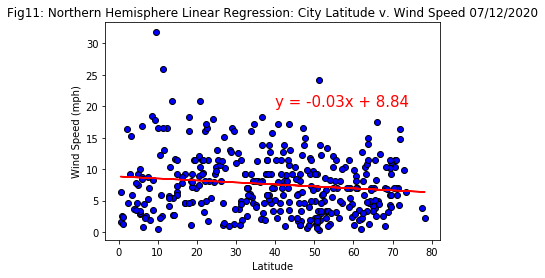

In [25]:
# Plotting linear regression for the Northern Hemisphere by 'Latitude v. Wind Speed':
x = northern_hemi['Latitude']
y = northern_hemi['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eqn = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x, y, facecolor='blue', edgecolor='black')
plt.plot(x, regress_values, "r-")
plt.annotate(line_eqn,(40,20), fontsize=15, color="r")
plt.title(f"Fig11: Northern Hemisphere Linear Regression: City Latitude v. Wind Speed {current_date}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(f"The r-squared is: {rvalue**2}")
plt.savefig('../OutputData/Fig11.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0031721107070905308


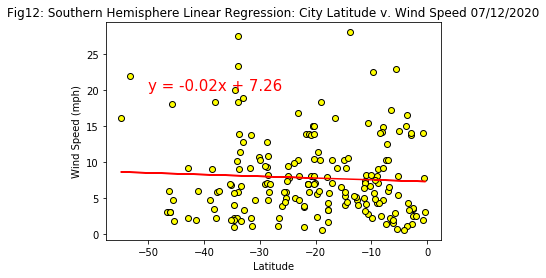

In [26]:
# Plotting linear regression for the Southern Hemisphere by 'Latitude v. Wind Speed':
x = southern_hemi['Latitude']
y = southern_hemi['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eqn = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x, y, facecolor='yellow', edgecolor='black')
plt.plot(x, regress_values, "r-")
plt.annotate(line_eqn,(-50,20), fontsize=15, color="r")
plt.title(f"Fig12: Southern Hemisphere Linear Regression: City Latitude v. Wind Speed {current_date}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(f"The r-squared is: {rvalue**2}")
plt.savefig('../OutputData/Fig12.png')
plt.show()

* Comparing the Northern and Southern Hemisphere:
    * In this last pair of plots, both the Northern and Southern Hemispheres were very similar. There seems to be only one city in each hemisphere where they are experiencing winds above 30-35 mph.